In [1]:
!pwd
!which python

/media/ebeyerle/seagate/frenkel/ellipsoid/GB/nvt/GB_3_5_2_1/anneal/notebooks
/home/ebeyerle/anaconda3/envs/hoomd/bin/python


In [2]:
#import hoomd
#import gsd.hoomd
import numpy as np
#import freud
#import rowan
import matplotlib.pyplot as plt
import subprocess
from scipy import spatial
from tqdm import tqdm
from scipy import optimize

In [3]:
def coordination(ftraj, boxl, r_cut = 3.0):
	N = ftraj.shape[1]
	C = np.zeros(ftraj.shape[0])
	for i in range(N):
		#if i % 10 == 0: print(i)
		for j in range(N):
			if i == j: pass
			tmp = ftraj[:,i,:] - ftraj[:,j,:]
			rij = np.linalg.norm(tmp, axis = 1)
			rij = rij - boxl * np.rint(2 * rij/boxl)
			C = C + (1 - (rij / r_cut)**6) / (1 - (rij / r_cut)**12)
	return C / N

def fit_power(x, a, b):
    return a*(np.abs(x)**b)

def linfit(x, a, b):
    return a * x + b

In [4]:
params = {'legend.fontsize': 25,
          'figure.figsize': (8, 6),
         'axes.labelsize': 30,
         'axes.titlesize':25,
         'xtick.labelsize':25,'ytick.labelsize':25,
         'axes.linewidth':4,
         'xtick.major.width':3,'ytick.major.width':3,
         'xtick.minor.width':1,'ytick.minor.width':1,
         'xtick.major.size':5,'ytick.major.size':5,
         'xtick.minor.size':3,'ytick.minor.size':3,
         'xtick.direction':'in','ytick.direction':'in'
         }
plt.rcParams.update(params)

In [5]:
S_list = []
T_list = []
chi_list = []
colvar_list = []
PF_list = []
q4_list = []
q6_list = []
U_list = []
for T in [0.1, 0.25, 0.5, 0.8, 0.9, 1.0]:
    T_list.append(T)
    #if T == 0.8:
    tmp = np.load('../T_%s_rho_0.35/new_C_perp_colvar.npy' % T)[1000:]
    #else:
        #tmp = np.load('../T_%s_rho_0.35/calculated_colvar.npy' % T)
    S = tmp[:,0]
    S_list.append(S.mean())
    #colvar_list.append(S)
    #chi_list.append(S.var())
    #PF_list.append(tmp[:,1].mean())
    #q4_list.append(tmp[:,-2].mean())
    #q6_list.append(tmp[:,-1].mean())
    U_list.append(np.loadtxt('../T_%s_rho_0.35/e.txt' % T)[1000:10001])
    print(len(U_list[-1]))
for T in [1.3, 1.4, 1.5, 1.6, 1.7]:
    S = np.load('../T_%.1f_rho_0.35/S.npy' % T)[1000:]
    S_list.append(S.mean())
    T_list.append(T)
    U_list.append(np.loadtxt('../T_%s_rho_0.35/e.txt' % T)[1000:10001])
    print(len(U_list[-1]))
for T in [1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79]:
    S = np.load('../T_%.2f_rho_0.35/S.npy' % T)[1000:]
    S_list.append(S.mean())
    T_list.append(T)
    U_list.append(np.loadtxt('../T_%s_rho_0.35/e.txt' % T)[1000:10001])
    print(len(U_list[-1]))
for T in np.arange(1.8, 2.5, 0.1):
    S = np.load('../T_%.1f_rho_0.35/S.npy' % T)[1000:]
    S_list.append(S.mean())
    T_list.append(T)
    U_list.append(np.loadtxt('../T_%.1f_rho_0.35/e.txt' % T)[1000:10001])
    print(len(U_list[-1]))
U_list = np.array(U_list)

9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001
9001


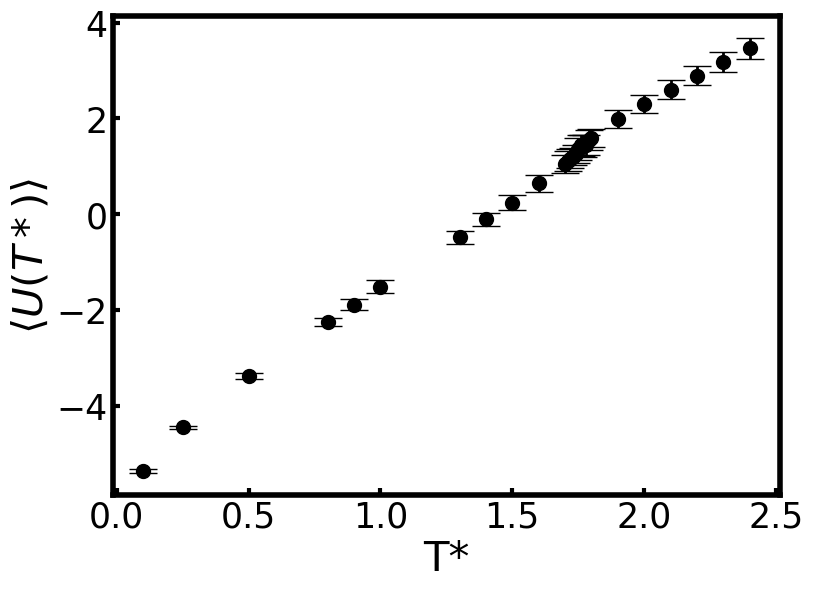

In [119]:
plt.errorbar(T_list, U_list.mean(1), yerr = U_list.std(1), marker = 'o', lw = 0,  c = 'k', markersize = 10, capthick = True,
            capsize = 10, elinewidth = 2)
plt.xlabel('T*')
plt.ylabel(r'$\langle U(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

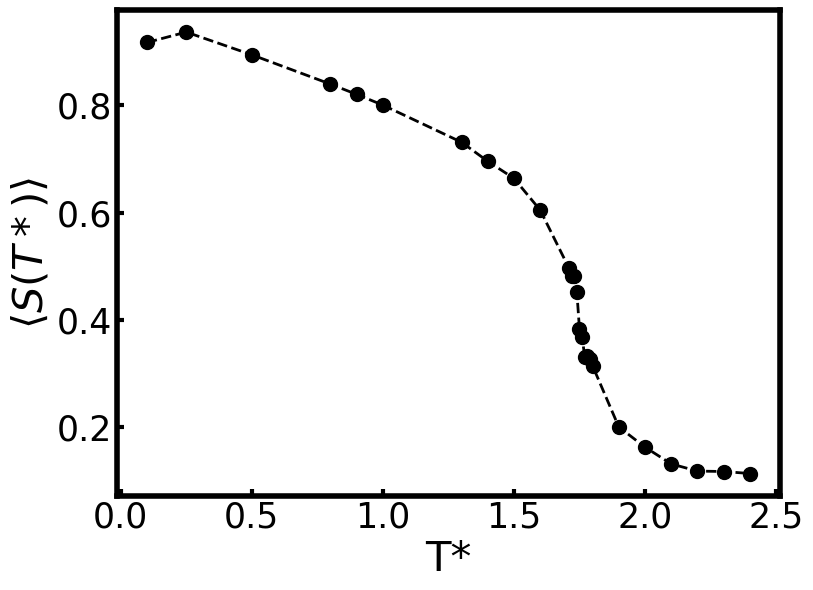

In [116]:
plt.plot(T_list, S_list, marker = 'o', lw = 2, ls = '--', c = 'k', markersize = 10)
plt.xlabel('T*')
plt.ylabel(r'$\langle S(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
plt.plot(T_list, S_list, marker = 'o', lw = 2, ls = '--', c = 'k', markersize = 10)
plt.xlabel('T*')
plt.ylabel(r'$\langle S(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

In [117]:
S_list = np.array(S_list)
T_list = np.array(T_list)
dT = T_list[1:] - T_list[:-1]

In [118]:
dSdT = np.gradient(S_list, T_list)

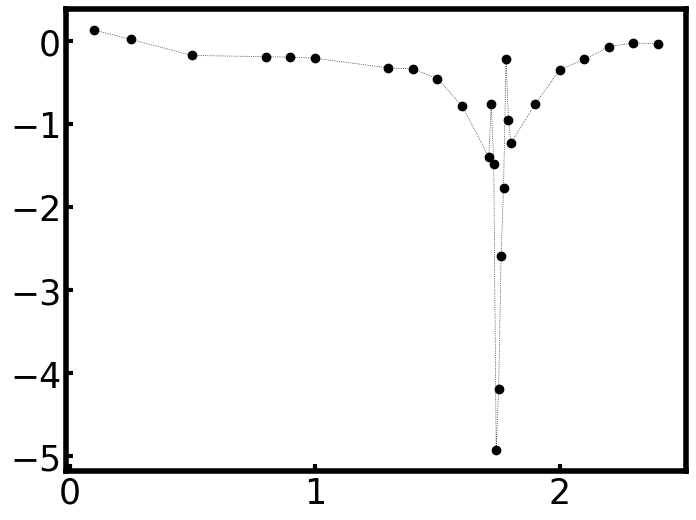

In [119]:
plt.plot(T_list, dSdT, marker = 'o', ls = ':', lw = 0.5, c = 'k')

In [120]:
T_star = (T_list - T_list[-13]) / T_list[-13]

In [121]:
T_list[-13]

1.74

In [122]:
T_fit_list = np.concatenate((T_star[8:13], T_star[14:20]))
S_fit_list = np.concatenate((S_list[8:13], S_list[14:20]))

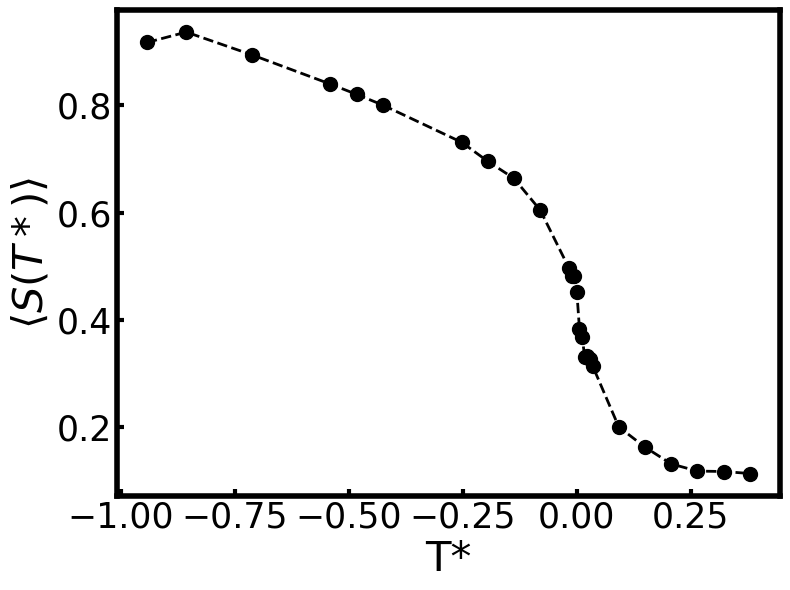

In [123]:
plt.plot(T_star, S_list, marker = 'o', lw = 2, ls = '--', c = 'k', markersize = 10)
plt.xlabel('T*')
plt.ylabel(r'$\langle S(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

In [124]:
# fit

params0, params_covar0 = optimize.curve_fit(fit_power, T_star[9:13], S_list[9:13])
print(params0, np.sqrt(np.diag(params_covar0)))

params1, params_covar1 = optimize.curve_fit(fit_power, T_star[14:20], S_list[14:20])
print(params1, np.sqrt(np.diag(params_covar1)))

[0.76191044 0.09730426] [0.06100058 0.02006465]
[ 0.21794663 -0.11071621] [0.01432127 0.01566623]


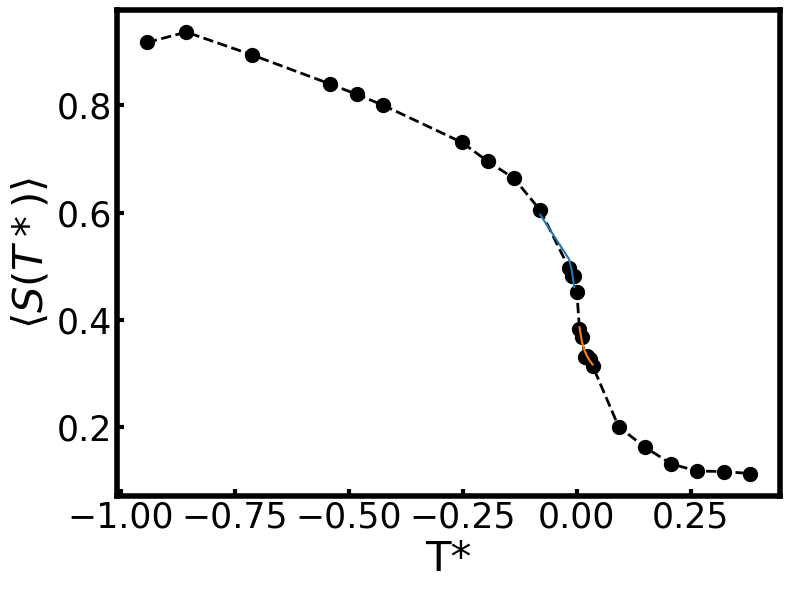

In [125]:
plt.plot(T_star, S_list, marker = 'o', lw = 2, ls = '--', c = 'k', markersize = 10)
plt.plot(T_star[9:13], fit_power(T_star[9:13], params0[0], params0[1]))
plt.plot(T_star[14:20], fit_power(T_star[14:20], params1[0], params1[1]))
plt.xlabel('T*')
plt.ylabel(r'$\langle S(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

In [126]:
# load TM results
tm = np.load('thermomaps-gayberne-main/nstep_100_bs_1024_lr_0.01_magnetization.npy')

In [127]:
T_tm = (np.arange(1.7, 1.8, 0.01) - 1.73) / 1.73

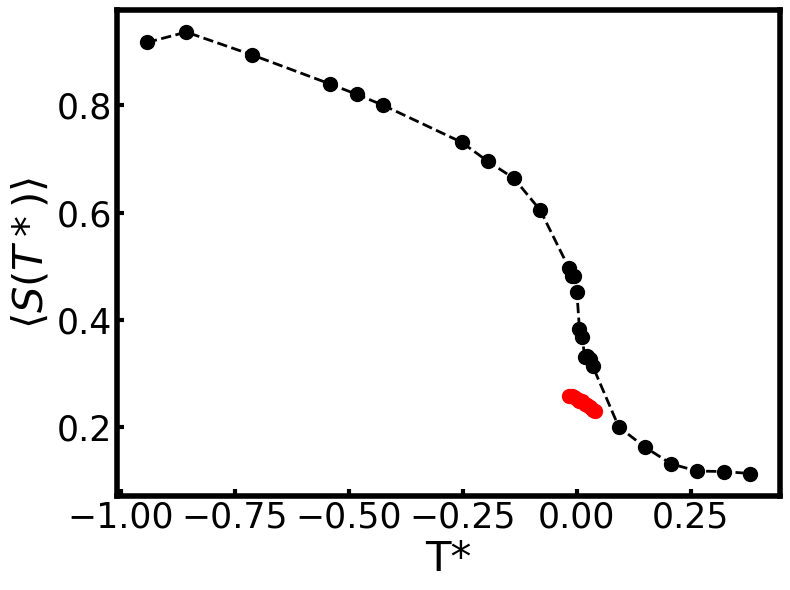

In [128]:
plt.plot(T_star, S_list, marker = 'o', lw = 2, ls = '--', c = 'k', markersize = 10)
plt.plot((tm[:,0] - 1.73) / 1.73, tm[:,1], marker = 'o', lw = 2, ls = '--', c = 'r', markersize = 10)

plt.xlabel('T*')
plt.ylabel(r'$\langle S(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

In [129]:
# fit

tm_params0, tm_params_covar0 = optimize.curve_fit(fit_power, (tm[:3,0] - 1.73) / 1.73, tm[:3,1])
print(tm_params0, np.sqrt(np.diag(tm_params_covar0)))

tm_params1, tm_params_covar1 = optimize.curve_fit(fit_power, (tm[4:,0] - 1.73) / 1.73, tm[4:,1])
print(tm_params1, np.sqrt(np.diag(tm_params_covar1)))

[0.26515316 0.00738866] [0.00661959 0.00545627]
[ 0.20419969 -0.04083885] [0.00580086 0.0070648 ]


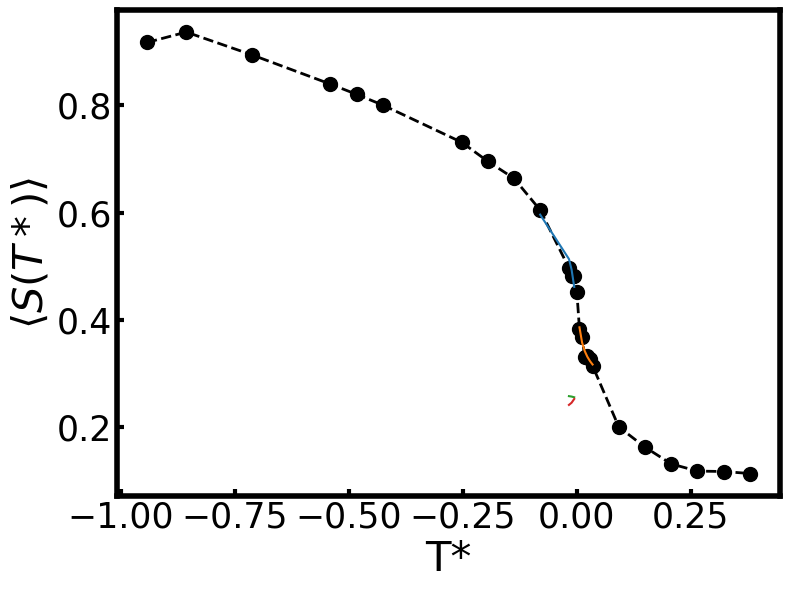

In [130]:
plt.plot(T_star, S_list, marker = 'o', lw = 2, ls = '--', c = 'k', markersize = 10)
plt.plot(T_star[9:13], fit_power(T_star[9:13], params0[0], params0[1]))
plt.plot(T_star[14:20], fit_power(T_star[14:20], params1[0], params1[1]))
plt.plot((tm[:3,0] - 1.73) / 1.73, fit_power((tm[:3,0] - 1.73) / 1.73, tm_params0[0], tm_params0[1]))
plt.plot((tm[:3,0] - 1.73) / 1.73, fit_power((tm[:3,0] - 1.73) / 1.73, tm_params1[0], tm_params1[1]))
plt.xlabel('T*')
plt.ylabel(r'$\langle S(T*)\rangle$')
plt.tight_layout()
plt.show()
plt.close()

In [6]:
T_list = [0.2, 0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]
mean_S = np.zeros(len(T_list))
std_S = np.zeros(len(T_list))
log_mean_S = np.zeros(len(T_list))
log_std_S = np.zeros(len(T_list))
S_sample_list = []

for i, temperature in enumerate(T_list):

    S = np.load('thermomaps-gayberne/%sT/S.npy' % temperature)
    S_sample_list.append(S)
    mean_S[i] = S.mean()
    std_S[i] = S.std()

    log_mean_S[i] = np.log(S).mean()
    log_std_S[i] = S.std() * abs(1 / S.mean())
S_sample_list = np.array(S_sample_list)

In [7]:
dS = np.zeros_like(S_sample_list)
dSdT_md = np.zeros_like(S_sample_list)
for i in range(S_sample_list.shape[0]):
    print(i)
    if (i == 0):
        dS[i,:] = S_sample_list[i + 1,:] - S_sample_list[i,:]
        dSdT_md[i,:] = (S_sample_list[i + 1,:] - S_sample_list[i,:]) / (T_list[i+1] - T_list[i])
    elif (i == S_sample_list.shape[0] - 1):
        dS[i,:] = S_sample_list[-1,:] - S_sample_list[-2,:]
        dSdT_md[i,:] = (S_sample_list[-1,:] - S_sample_list[-2,:]) / (T_list[-2] - T_list[-1])
    else:
        dS[i,:] = (S_sample_list[i + 1,:] - S_sample_list[i - 1,:]) / 2
        dSdT_md[i,:] = (S_sample_list[i + 1,:] - S_sample_list[i - 1,:]) / 2 / (T_list[i+1] - T_list[i-1])

ddS = dS.std(1)

0
1
2
3
4
5
6
7
8
9
10


In [8]:
dSdT = np.gradient(mean_S, T_list)

In [9]:
dSdT = np.gradient(mean_S, T_list)
ddSdT = abs(dSdT) * abs(ddS / np.mean(dS, axis = 1))
md_ddSdT = dSdT_md.std(1)

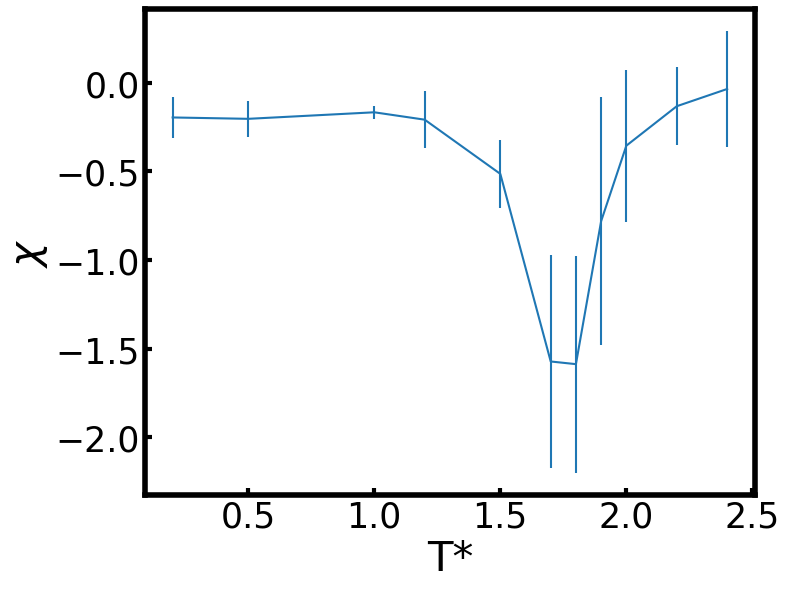

In [10]:
plt.errorbar(T_list, dSdT, yerr = ddSdT)
plt.ylabel(r'$\chi$')
plt.xlabel('T*')
plt.tight_layout()
plt.show()
plt.close()

In [11]:
T_star = np.concatenate([np.log((1.74 - np.array(T_list)[:6])), np.log((np.array(T_list)[6:] - 1.74))])
log_T_star = np.log(abs(T_star))

In [12]:
tm_samples = np.load('nstep_100_bs_1024_lr_0.01__samples_redo.npy')

In [13]:
mean_tm_S = tm_samples.mean(1)
std_tm_S = tm_samples.std(1)

mean_tm_log_S = np.log(tm_samples).mean(1)
std_tm_log_S = tm_samples.std(1) * abs(1 / tm_samples.mean(1))

In [14]:
# susceptibility from TM

dS_TM = np.zeros_like(tm_samples)
tm_dSdT = np.zeros_like(tm_samples)
for i in range(tm_samples.shape[0]):
    print(i)
    if (i == 0):
        dS_TM[i,:] = tm_samples[i + 1,:] - tm_samples[i,:]
        tm_dSdT[i,:] = (tm_samples[i + 1,:] - tm_samples[i,:]) / (T_list[i + 1] - T_list[i])
    elif (i == tm_samples.shape[0] - 1):
        dS_TM[i,:] = tm_samples[-1,:] - tm_samples[-2,:] 
        tm_dSdT[i,:] = tm_samples[-1,:] - tm_samples[-2,:] / (T_list[-1] - T_list[-2])
    else:
        dS_TM[i,:] = (tm_samples[i + 1,:] - tm_samples[i - 1,:]) / 2 
        tm_dSdT[i,:] = (tm_samples[i + 1,:] - tm_samples[i - 1,:]) / 2 / ((T_list[i + 1] - T_list[i - 1]))

ddS_TM = dS_TM.std(1)

0
1
2
3
4
5
6
7
8
9
10


In [15]:
dSdT_tm = np.gradient(mean_tm_S, T_list)
ddSdT_tm = abs(dSdT_tm) * abs(ddS_TM / np.mean(dS_TM, axis = 1))
tm_ddSdT = tm_dSdT.std(1)

In [16]:
# susceptibility from TM

tm_chi = np.zeros_like(tm_samples)
md_chi = np.zeros_like(S_sample_list)
for i in range(tm_samples.shape[0]):
    print(i)
    tm_chi[i,:] = (tm_samples[i,:]**2) / T_list[i]
    md_chi[i,:] = (S_sample_list[i,:]**2) / T_list[i]

dtm_chi = tm_chi.std(1)
dmd_chi = md_chi.std(1)

0
1
2
3
4
5
6
7
8
9
10


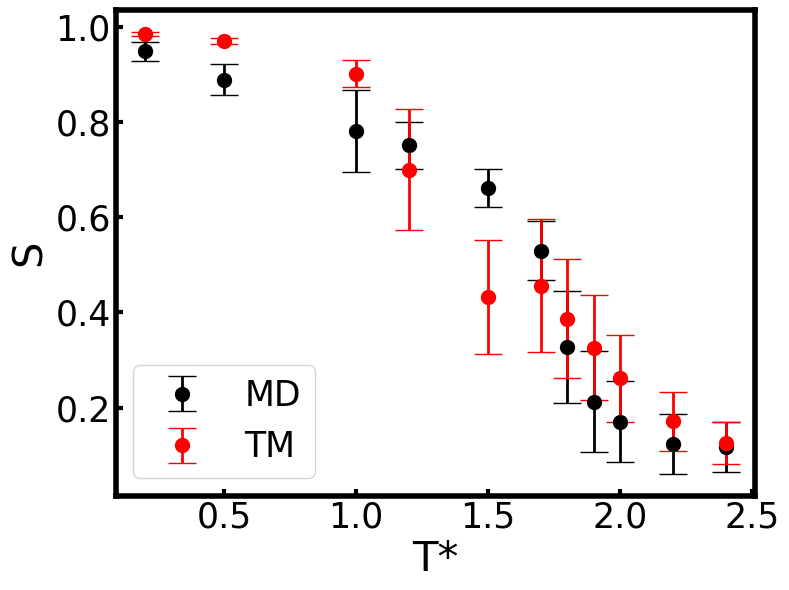

In [52]:
plt.errorbar(T_list, mean_S, yerr = std_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, mean_tm_S, yerr = std_tm_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.xlabel(r'T*')
plt.ylabel(r'S')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.savefig('S_TM_MD.pdf', dpi = 300)
plt.show()
plt.close()

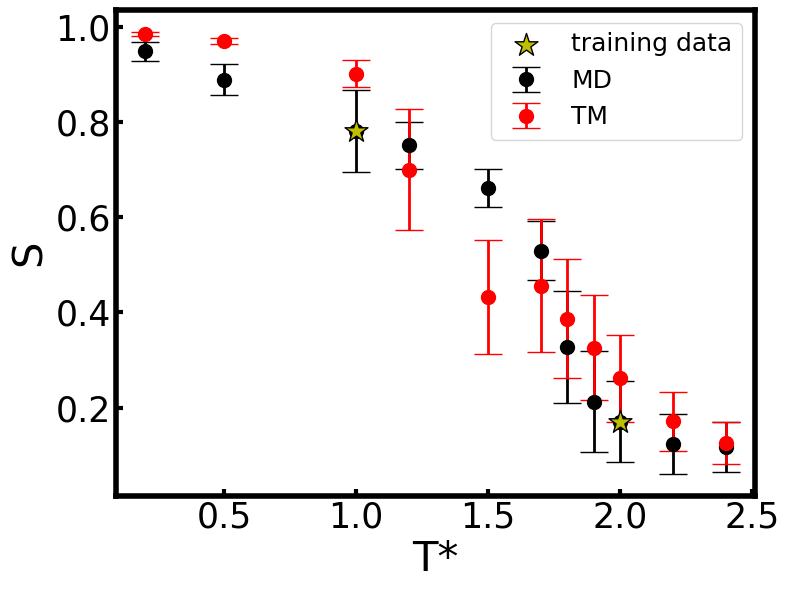

In [31]:
plt.errorbar(T_list, mean_S, yerr = std_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, mean_tm_S, yerr = std_tm_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter(T_list[2], mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_list[-3], mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel('S')
plt.tick_params()
plt.tight_layout()
plt.savefig('S_TM_MD_stars.pdf', dpi = 300)
plt.show()
plt.close()

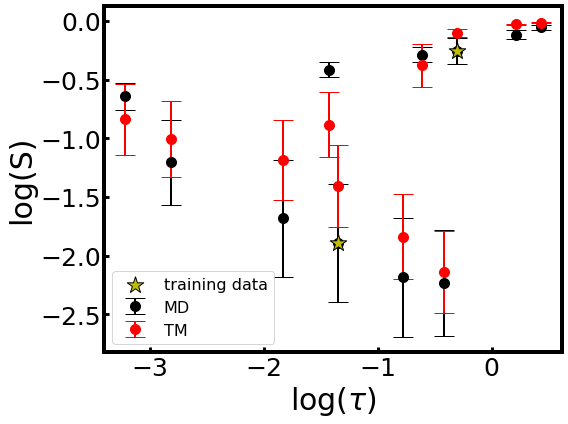

In [60]:
plt.errorbar(T_star, log_mean_S, yerr = log_std_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_S, yerr = std_tm_log_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.scatter(T_star[2], log_mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], log_mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log(S)')
plt.tight_layout()
plt.savefig('magnetization_tm_md_comparison.pdf', dpi = 300)
plt.show()
plt.close()

In [17]:
top_branch = T_star[:6]
bottom_branch = T_star[5:]

In [18]:
from scipy import optimize

In [19]:
top_md_params, top_md_params_cov = optimize.curve_fit(linfit, top_branch, log_mean_S[:6])
print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))

top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, top_branch, mean_tm_log_S[:6])
print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))

print('')

bottom_md_params, bottom_md_params_cov = optimize.curve_fit(linfit, bottom_branch, log_mean_S[5:])
print(bottom_md_params, np.sqrt(np.diag(bottom_md_params_cov)))

bottom_tm_params, bottom_tm_params_cov = optimize.curve_fit(linfit, bottom_branch, mean_tm_log_S[5:])
print(bottom_tm_params, np.sqrt(np.diag(bottom_tm_params_cov)))

# fit errors when plotting

m = bottom_md_params[0]
b = bottom_md_params[1]
dm = np.sqrt(bottom_md_params_cov[0,0])
db = np.sqrt(bottom_md_params_cov[1,1])
df_md_bottom = np.sqrt(T_star**2 * dm**2 + db**2)

m = bottom_tm_params[0]
b = bottom_tm_params[1]
dm = np.sqrt(bottom_tm_params_cov[0,0])
db = np.sqrt(bottom_tm_params_cov[1,1])
df_tm_bottom = np.sqrt(T_star**2 * dm**2 + db**2)


m = top_md_params[0]
b = top_md_params[1]
dm = np.sqrt(top_md_params_cov[0,0])
db = np.sqrt(top_md_params_cov[1,1])
df_md_top = np.sqrt(T_star**2 * dm**2 + db**2)

m = top_tm_params[0]
b = top_tm_params[1]
dm = np.sqrt(top_tm_params_cov[0,0])
db = np.sqrt(top_tm_params_cov[1,1])
df_tm_top = np.sqrt(T_star**2 * dm**2 + db**2)

[ 0.15564697 -0.16844086] [0.01329363 0.01964348]
[ 0.26147864 -0.1609247 ] [0.06975367 0.10307223]

[-0.54179237 -2.5806327 ] [0.0591558  0.11886502]
[-0.43212743 -2.15293487] [0.06275943 0.126106  ]


In [20]:
bottom_md_params

array([-0.54179237, -2.5806327 ])

In [21]:
bottom_md_params_cov

array([[0.00349941, 0.00606797],
       [0.00606797, 0.01412889]])

In [22]:
df_md_bottom

array([0.1215784 , 0.11954422, 0.12019219, 0.12432846, 0.14579438,
       0.2244701 , 0.20451819, 0.16087618, 0.14310466, 0.12743243,
       0.12137988])

In [23]:
linfit(T_star, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom

array([-2.93614752, -2.81672262, -2.53768845, -2.37111621, -1.95322632,
       -1.06114043, -1.26086642, -1.74863022, -1.99390313, -2.28734775,
       -2.47688948])

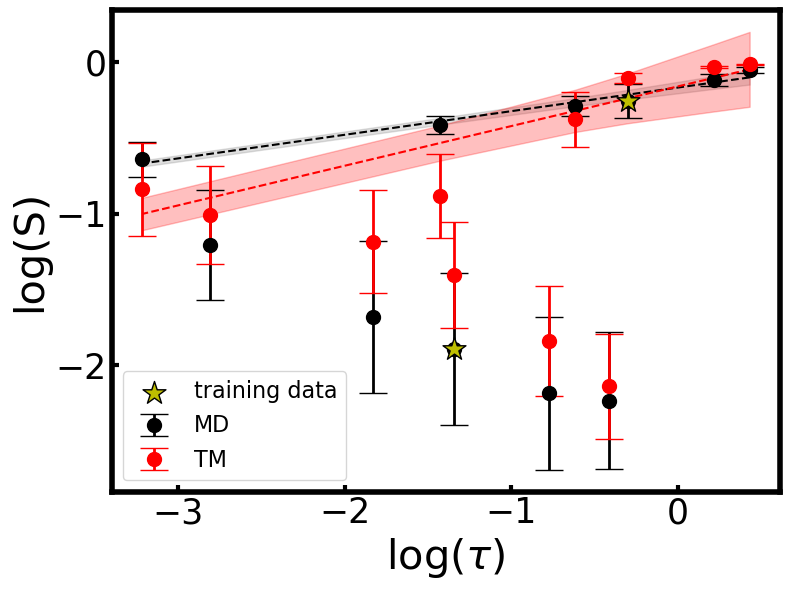

In [24]:
plt.errorbar(T_star, log_mean_S, yerr = log_std_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_S, yerr = std_tm_log_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
#                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
#                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
plt.scatter(T_star[2], log_mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], log_mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log(S)')
plt.tight_layout()
plt.savefig('magnetization_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

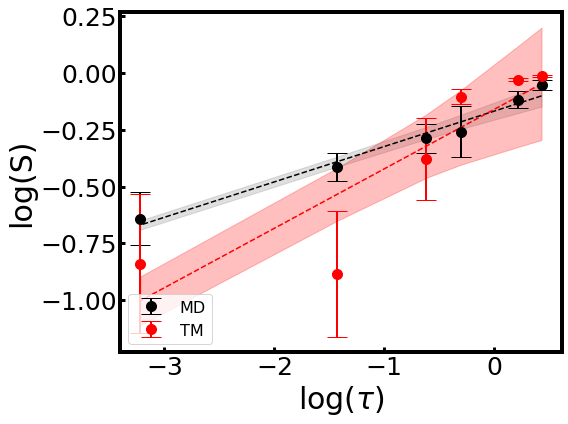

In [96]:
plt.errorbar(T_star[:6], log_mean_S[:6], yerr = log_std_S[:6], marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star[:6], mean_tm_log_S[:6], yerr = std_tm_log_S[:6], marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
#                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
#                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
#plt.scatter(T_star[2], log_mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
#plt.scatter(T_star[-3], log_mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
#           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log(S)')
plt.tight_layout()
plt.savefig('magnetization_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

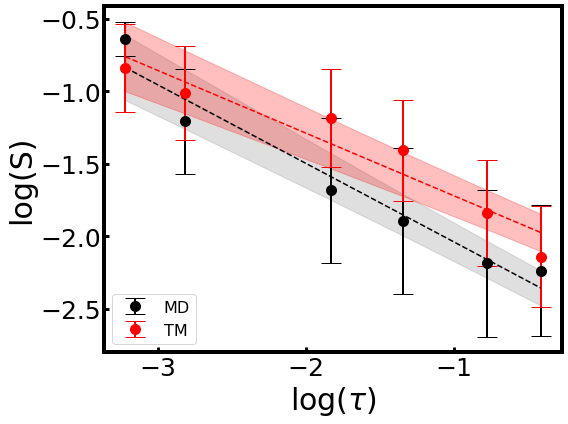

In [97]:
plt.errorbar(T_star[5:], log_mean_S[5:], yerr = log_std_S[5:], marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star[5:], mean_tm_log_S[5:], yerr = std_tm_log_S[5:], marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
                alpha = 0.25)
plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
                alpha = 0.25)
plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

#plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
#                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
#                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
#plt.scatter(T_star[2], log_mean_S[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
#plt.scatter(T_star[-3], log_mean_S[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
#           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log(S)')
plt.tight_layout()
#plt.savefig('magnetization_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

In [151]:
# draw ~100 samples from each temperature value and fit the trendlines individually to each
# to determine the error

nsamples = 10
tm_random_samples = np.zeros((tm_samples.shape[0], nsamples))
md_random_samples = np.zeros((tm_samples.shape[0], nsamples))
for i in range(tm_samples.shape[0]):
    tm_random_samples[i,:] = np.random.choice(tm_samples[i,:], size = nsamples)
    S = np.load('thermomaps-gayberne/%sT/S.npy' % temperature)
    md_random_samples[i,:] = np.random.choice(S, size = nsamples)

In [152]:
top_tm_exponents = []
top_md_exponents = []
bottom_tm_exponents = []
bottom_md_exponents = []
for i in range(nsamples):
    top_md_params, top_md_params_cov = optimize.curve_fit(linfit, top_branch, np.log(md_random_samples[:6,i]))
    print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))
    top_md_exponents.append(top_md_params[0])

    top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, top_branch, np.log(tm_random_samples[:6,i]))
    print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))
    top_tm_exponents.append(top_tm_params[0])

    bottom_md_params, bottom_md_params_cov = optimize.curve_fit(linfit, bottom_branch, np.log(md_random_samples[5:,i]))
    print(bottom_md_params, np.sqrt(np.diag(bottom_md_params_cov)))
    bottom_md_exponents.append(bottom_md_params[0])
    
    bottom_tm_params, bottom_tm_params_cov = optimize.curve_fit(linfit, bottom_branch, np.log(tm_random_samples[5:,i]))
    print(bottom_tm_params, np.sqrt(np.diag(bottom_tm_params_cov)))
    bottom_tm_exponents.append(bottom_tm_params[0])
    print('')

top_md_exponents = np.array(top_md_exponents)
top_tm_exponents = np.array(top_tm_exponents)
bottom_md_exponents = np.array(bottom_md_exponents)
bottom_tm_exponents = np.array(bottom_tm_exponents)

[-0.08720393 -2.2583279 ] [0.03575339 0.06590634]
[0.24913829 0.01388929] [0.0623187  0.11487576]
[-0.37835862 -2.91668913] [0.11518829 0.28831995]
[-0.34712662 -2.31314512] [0.23364599 0.58482337]

[ 0.00330709 -2.07700961] [0.2017442  0.37188663]
[0.2807567  0.00706572] [0.07255071 0.13373703]
[ 0.0399637  -2.13795152] [0.17561926 0.43958055]
[-0.3581717  -2.22482506] [0.11485912 0.28749605]

[-0.07892716 -2.46102857] [0.11125748 0.20508753]
[ 0.26234056 -0.06873087] [0.19370153 0.35706152]
[-0.0053537  -2.36555717] [0.19248165 0.48178769]
[-0.32408435 -2.17470736] [0.16182221 0.40504616]

[-0.04527841 -2.10598009] [0.14922275 0.27507115]
[0.60741282 0.15654834] [0.12468243 0.22983453]
[-0.19657954 -2.86206939] [0.2218296  0.55524656]
[-0.33182287 -2.47378538] [0.29626686 0.7415654 ]

[ 0.06451946 -2.18862126] [0.19863541 0.36615644]
[0.39013336 0.09327843] [0.05419387 0.09989877]
[-0.1988502  -2.82679569] [0.18873561 0.47241125]
[-0.56940594 -3.10436304] [0.13212648 0.3307168 ]

[-0

In [153]:
bottom_tm_exponents

array([-0.34712662, -0.3581717 , -0.32408435, -0.33182287, -0.56940594,
       -0.28674604, -0.50517089, -0.46390701, -0.50711415, -0.45295422])

In [154]:
print(np.mean(top_md_exponents),'+/-', 2 * np.std(top_md_exponents) / np.sqrt(nsamples))
print(np.mean(top_tm_exponents),'+/-', 2 * np.std(top_tm_exponents) / np.sqrt(nsamples))

print(np.mean(bottom_md_exponents),'+/-', 2 * np.std(bottom_md_exponents) / np.sqrt(nsamples))
print(np.mean(bottom_tm_exponents),'+/-', 2 * np.std(bottom_tm_exponents) / np.sqrt(nsamples))

0.017916662744925822 +/- 0.07195131330503639
0.3049278463944413 +/- 0.07338041284987201
-0.03184008238094921 +/- 0.12599926479706008
-0.4146503798881012 +/- 0.05788181767018363


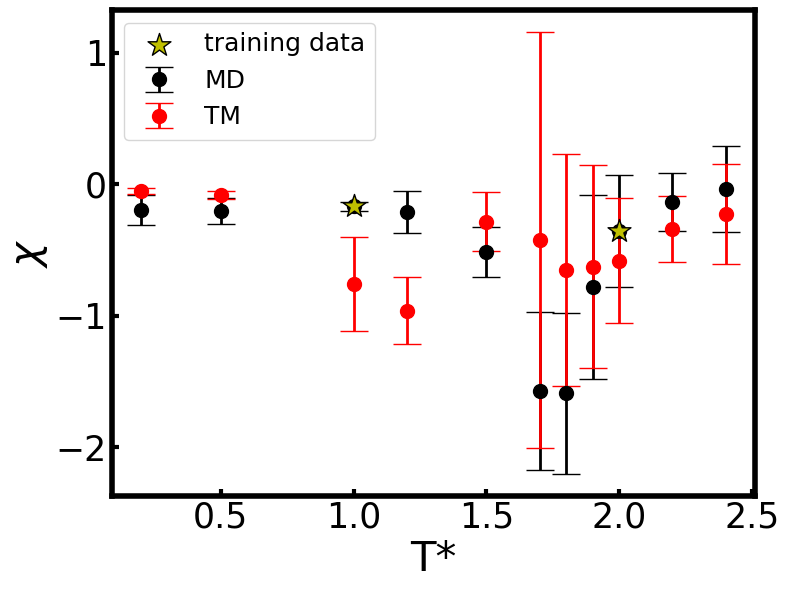

In [75]:
plt.errorbar(T_list, dSdT, yerr = ddSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, dSdT_tm, yerr = ddSdT_tm, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter(T_list[2], dSdT[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_list[-3], dSdT[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel(r'$\chi$')
plt.tick_params()
plt.tight_layout()
plt.savefig('chi_TM_MD_stars.pdf', dpi = 300)
plt.show()
plt.close()

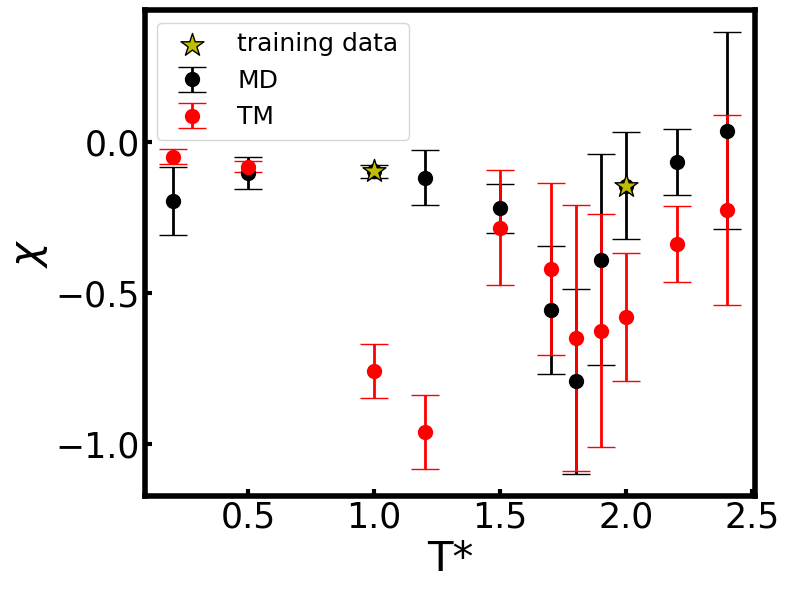

In [76]:
plt.errorbar(T_list, dSdT_md.mean(1), yerr = md_ddSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, dSdT_tm, yerr = tm_ddSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter(T_list[2], dSdT_md.mean(1)[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_list[-3], dSdT_md.mean(1)[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel(r'$\chi$')
plt.tick_params()
plt.tight_layout()
#plt.savefig('chi_TM_MD_stars.pdf', dpi = 300)
plt.show()
plt.close()

In [91]:
# log-log plot for scaling law

mean_md_log_dSdT = np.log(abs(dSdT_md), where = dSdT_md != 0).mean(1)
std_md_log_dSdT = dSdT_md.std(1) * abs(1 / dSdT_md.mean(1))

mean_tm_log_dSdT = np.log(abs(tm_dSdT), where = tm_dSdT != 0).mean(1)
std_tm_log_dSdT = tm_dSdT.std(1) * abs(1 / tm_dSdT.mean(1))

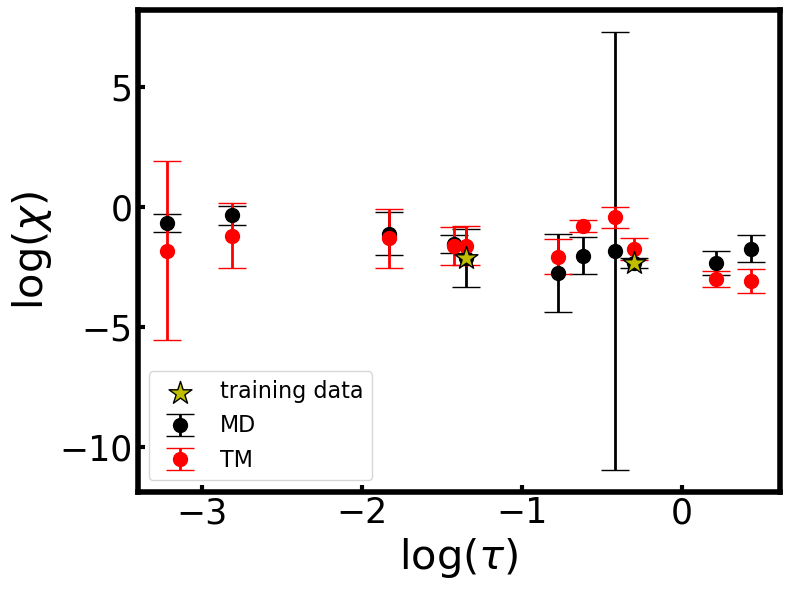

In [93]:
plt.errorbar(T_star, mean_md_log_dSdT, yerr = std_md_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_dSdT, yerr = std_tm_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.scatter(T_star[2], mean_md_log_dSdT[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_dSdT[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\chi$)')
plt.tight_layout()
plt.savefig('susceptibility_tm_md_comparison.pdf', dpi = 300)
plt.show()
plt.close()

In [96]:
top_md_params, top_md_params_cov = optimize.curve_fit(linfit, top_branch, mean_md_log_dSdT[:6])
print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))

top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, top_branch, mean_tm_log_dSdT[:6])
print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))

print('')

bottom_md_params, bottom_md_params_cov = optimize.curve_fit(linfit, bottom_branch, mean_md_log_dSdT[5:])
print(bottom_md_params, np.sqrt(np.diag(bottom_md_params_cov)))

bottom_tm_params, bottom_tm_params_cov = optimize.curve_fit(linfit, bottom_branch, mean_tm_log_dSdT[5:])
print(bottom_tm_params, np.sqrt(np.diag(bottom_tm_params_cov)))

# fit errors when plotting

m = bottom_md_params[0]
b = bottom_md_params[1]
dm = np.sqrt(bottom_md_params_cov[0,0])
db = np.sqrt(bottom_md_params_cov[1,1])
df_md_bottom = np.sqrt(T_star**2 * dm**2 + db**2)

m = bottom_tm_params[0]
b = bottom_tm_params[1]
dm = np.sqrt(bottom_tm_params_cov[0,0])
db = np.sqrt(bottom_tm_params_cov[1,1])
df_tm_bottom = np.sqrt(T_star**2 * dm**2 + db**2)


m = top_md_params[0]
b = top_md_params[1]
dm = np.sqrt(top_md_params_cov[0,0])
db = np.sqrt(top_md_params_cov[1,1])
df_md_top = np.sqrt(T_star**2 * dm**2 + db**2)

m = top_tm_params[0]
b = top_tm_params[1]
dm = np.sqrt(top_tm_params_cov[0,0])
db = np.sqrt(top_tm_params_cov[1,1])
df_tm_top = np.sqrt(T_star**2 * dm**2 + db**2)

[-0.40267905 -2.10062802] [0.11685852 0.1726772 ]
[-0.29748865 -2.24978267] [0.29067383 0.42951719]

[-0.71009594 -2.70099265] [0.21415927 0.43032207]
[ 0.15488794 -1.13332995] [0.24602445 0.49435054]


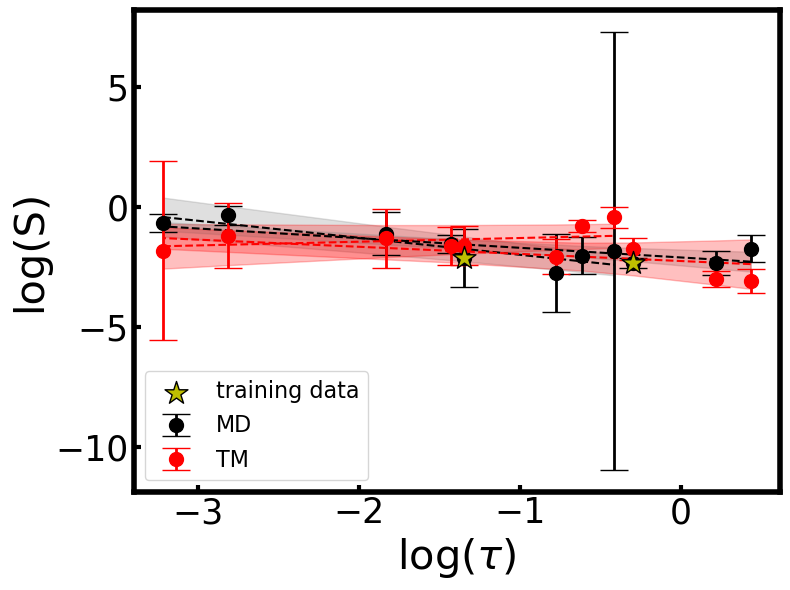

In [99]:
plt.errorbar(T_star, mean_md_log_dSdT, yerr = std_md_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_dSdT, yerr = std_tm_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
                alpha = 0.25)
plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
                alpha = 0.25)
plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
plt.scatter(T_star[2], mean_md_log_dSdT[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_dSdT[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log(S)')
plt.tight_layout()
plt.savefig('susceptibility_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

In [100]:
top_md_params, top_md_params_cov = optimize.curve_fit(linfit, T_star, mean_md_log_dSdT)
print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))

top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, T_star, mean_tm_log_dSdT)
print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))


# fit errors when plotting


m = top_md_params[0]
b = top_md_params[1]
dm = np.sqrt(top_md_params_cov[0,0])
db = np.sqrt(top_md_params_cov[1,1])
df_md_top = np.sqrt(T_star**2 * dm**2 + db**2)

m = top_tm_params[0]
b = top_tm_params[1]
dm = np.sqrt(top_tm_params_cov[0,0])
db = np.sqrt(top_tm_params_cov[1,1])
df_tm_top = np.sqrt(T_star**2 * dm**2 + db**2)

[-0.5020805  -2.25906456] [0.12954633 0.20282764]
[-0.26554705 -1.98638194] [0.21415019 0.33528994]


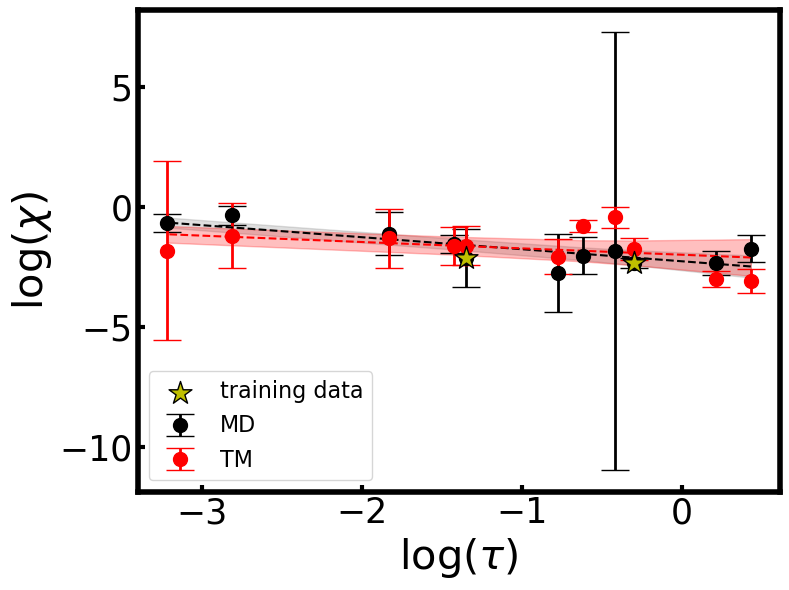

In [103]:
plt.errorbar(T_star, mean_md_log_dSdT, yerr = std_md_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_dSdT, yerr = std_tm_log_dSdT, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')
plt.scatter(T_star[2], mean_md_log_dSdT[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_dSdT[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\chi$)')
plt.tight_layout()
plt.savefig('susceptibility_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()

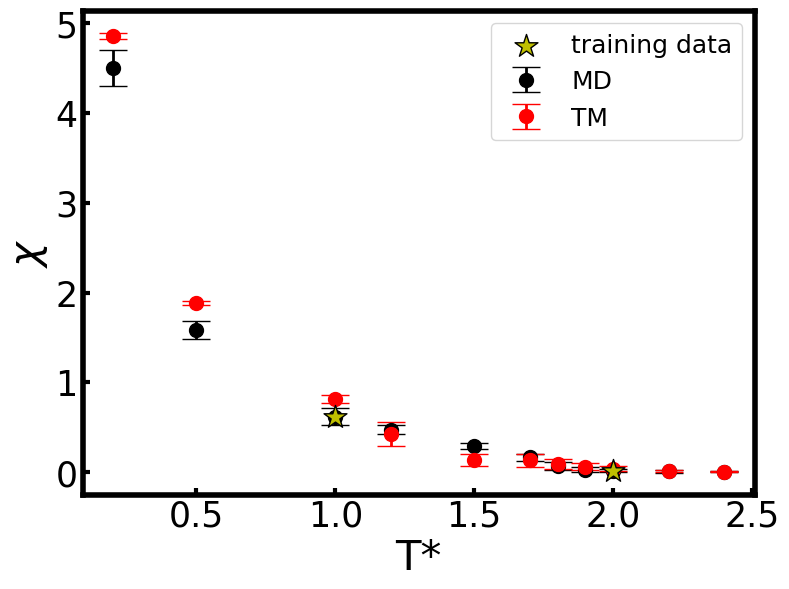

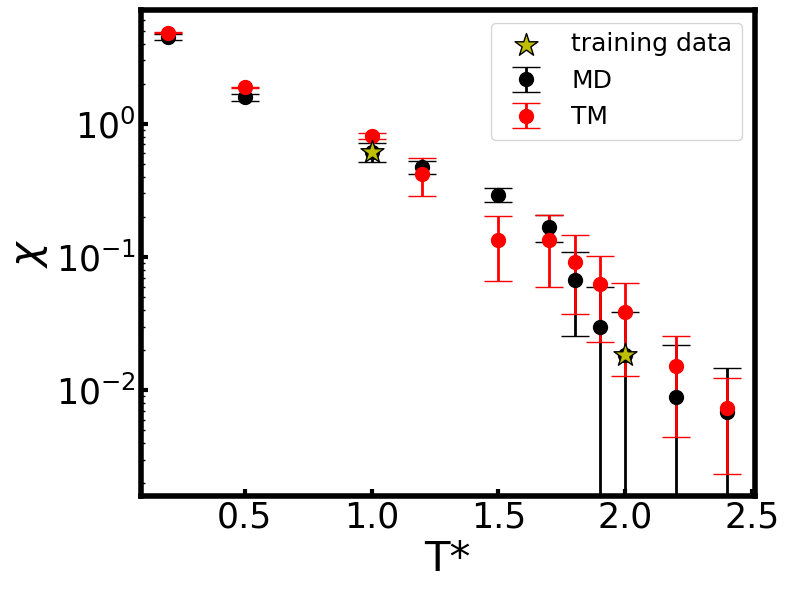

In [90]:
plt.errorbar(T_list, md_chi.mean(1), yerr = dmd_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, tm_chi.mean(1), yerr = dtm_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter(T_list[2], md_chi.mean(1)[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_list[-3], md_chi.mean(1)[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel(r'$\chi$')
plt.tick_params()
#plt.yscale('log')
plt.tight_layout()
plt.savefig('chi_TM_MD_stars.pdf', dpi = 300)
plt.show()
plt.close()

plt.errorbar(T_list, md_chi.mean(1), yerr = dmd_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, tm_chi.mean(1), yerr = dtm_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
#mag_med = np.load('nstep_%s_bs_%s_lr_%s_magnetization_redo.npy' % (nstep, bs, lr))
#plt.errorbar(mag_med[:,0], mag_med[:,1], yerr = mag_med[:,2], elinewidth = 2, marker = 'o', lw = 0,
#            capsize = 5, c = 'b', label = 'two-point TM',)
plt.scatter(T_list[2], md_chi.mean(1)[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_list[-3], md_chi.mean(1)[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 18)
plt.xlabel('T*')
plt.ylabel(r'$\chi$')
plt.tick_params()
plt.yscale('log')
plt.tight_layout()
plt.savefig('lin-log_chi_TM_MD_stars.pdf', dpi = 300)
plt.show()
plt.close()

In [25]:
# log-log plot for scaling law

mean_md_log_chi = np.log(md_chi, where = md_chi != 0).mean(1)
std_md_log_chi = md_chi.std(1) * abs(1 / md_chi.mean(1))

mean_tm_log_chi = np.log(tm_chi, where = tm_chi != 0).mean(1)
std_tm_log_chi = tm_chi.std(1) * abs(1 / tm_chi.mean(1))

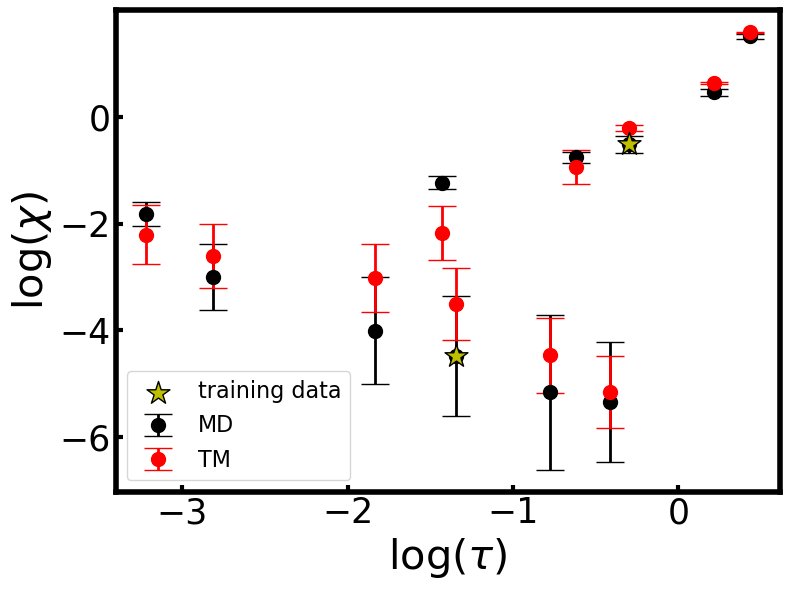

In [145]:
plt.errorbar(T_star, mean_md_log_chi, yerr = std_md_log_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_chi, yerr = std_tm_log_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.scatter(T_star[2], mean_md_log_chi[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_chi[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\chi$)')
plt.tight_layout()
plt.savefig('chi_tm_md_comparison.pdf', dpi = 300)
plt.show()
plt.close()

In [26]:
top_md_params, top_md_params_cov = optimize.curve_fit(linfit, top_branch, mean_md_log_chi[:6])
print(top_md_params, np.sqrt(np.diag(top_md_params_cov)))

top_tm_params, top_tm_params_cov = optimize.curve_fit(linfit, top_branch, mean_tm_log_chi[:6])
print(top_tm_params, np.sqrt(np.diag(top_tm_params_cov)))

print('')

bottom_md_params, bottom_md_params_cov = optimize.curve_fit(linfit, bottom_branch, mean_md_log_chi[5:])
print(bottom_md_params, np.sqrt(np.diag(bottom_md_params_cov)))

bottom_tm_params, bottom_tm_params_cov = optimize.curve_fit(linfit, bottom_branch, mean_tm_log_chi[5:])
print(bottom_tm_params, np.sqrt(np.diag(bottom_tm_params_cov)))

# fit errors when plotting

m = bottom_md_params[0]
b = bottom_md_params[1]
dm = np.sqrt(bottom_md_params_cov[0,0])
db = np.sqrt(bottom_md_params_cov[1,1])
df_md_bottom = np.sqrt(T_star**2 * dm**2 + db**2)

m = bottom_tm_params[0]
b = bottom_tm_params[1]
dm = np.sqrt(bottom_tm_params_cov[0,0])
db = np.sqrt(bottom_tm_params_cov[1,1])
df_tm_bottom = np.sqrt(T_star**2 * dm**2 + db**2)


m = top_md_params[0]
b = top_md_params[1]
dm = np.sqrt(top_md_params_cov[0,0])
db = np.sqrt(top_md_params_cov[1,1])
df_md_top = np.sqrt(T_star**2 * dm**2 + db**2)

m = top_tm_params[0]
b = top_tm_params[1]
dm = np.sqrt(top_tm_params_cov[0,0])
db = np.sqrt(top_tm_params_cov[1,1])
df_tm_top = np.sqrt(T_star**2 * dm**2 + db**2)

[0.77570845 0.24102042] [0.21907776 0.32372253]
[0.98737179 0.25605273] [0.27524776 0.40672271]

[-1.19543563 -6.04143825] [0.11311208 0.22728237]
[-0.97610575 -5.1860426 ] [0.13916456 0.27963106]


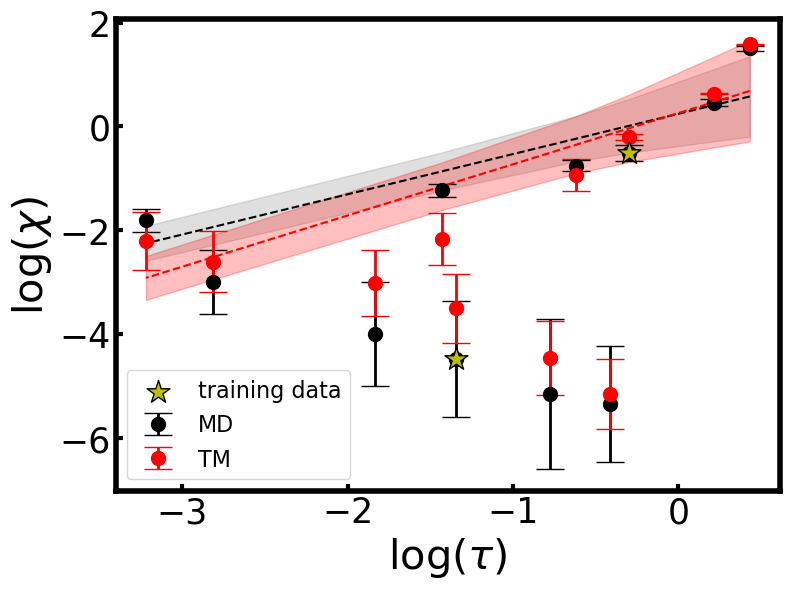

In [28]:
plt.errorbar(T_star, mean_md_log_chi, yerr = std_md_log_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_star, mean_tm_log_chi, yerr = std_tm_log_chi, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'r', elinewidth = 2, capthick = True,
            label = 'TM')
plt.fill_between(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]) - df_md_top[5:],
                 linfit(top_branch, top_md_params[0], top_md_params[1]) + df_md_top[5:], color = 'grey',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_md_params[0], top_md_params[1]), color = 'k', ls = '--')
plt.fill_between(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]) - df_tm_top[5:],
                 linfit(top_branch, top_tm_params[0], top_tm_params[1]) + df_tm_top[5:], color = 'r',
                alpha = 0.25)
plt.plot(top_branch, linfit(top_branch, top_tm_params[0], top_tm_params[1]), color = 'r', ls = '--')

#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) - df_md_bottom[5:],
#                 linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]) + df_md_bottom[5:], color = 'grey',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_md_params[0], bottom_md_params[1]), color = 'k', ls = '--')
#plt.fill_between(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) - df_tm_bottom[5:],
#                 linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]) + df_tm_bottom[5:], color = 'r',
#                alpha = 0.25)
#plt.plot(bottom_branch, linfit(bottom_branch, bottom_tm_params[0], bottom_tm_params[1]), color = 'r', ls = '--')

plt.scatter(T_star[2], mean_md_log_chi[2], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10)
plt.scatter(T_star[-3], mean_md_log_chi[-3], marker = '*', edgecolor = 'k', color = 'y', s = 300, zorder = 10,
           label = 'training data')
plt.legend(fontsize = 16,loc = 'lower left')
plt.xlabel(r'log($\tau$)')
plt.ylabel(r'log($\chi$)')
plt.tight_layout()
plt.savefig('chi_tm_md_comparison_top_fit.pdf', dpi = 300)
plt.show()
plt.close()